## TASK-2- UNSUPERVISED MACHINE LEARNING

### OBJECTIVE

#### From the given 'ires datasts' predict the optinum number of cluster and represent it visually

## Auther- UPENDRA PRATAP SINGH 

### Import Required Libreies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Datasets

In [2]:
data=pd.read_csv('D:\DATASETS\IRISDATASETS\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
clu=data['Species']
clu.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Devide the datasets

In [6]:
X=data.drop(['Id','Species'], axis=1).values
Y=pd.DataFrame(data['Species']).values

In [7]:
X.shape

(150, 4)

In [8]:
Y.shape

(150, 1)

### UNSUPERVISED MACHINE LEARNING ALGORITHM K-MEANS CLUSTRING IS USED

In [9]:
# FIND THE OPTIMUM NO OF CLUSTER IS USED IN K- MEANS BY ALBOW METHOD

from sklearn.cluster import KMeans

C:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


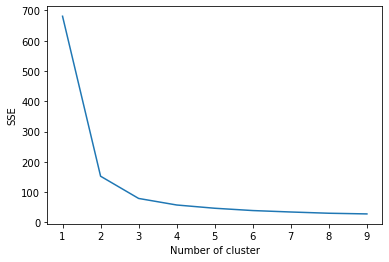

In [10]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state = 0, init = 'k-means++', n_init = 10)
    kmeans.fit(X)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

For optimum no of cluster the SSE(SUM OF SQUARE ERROR) does not decrease significantly with every itration
i.e. in above graph show the number of cluter=3 is optimun.

In [11]:
# FIND THE OPTIMUM NO OF CLUSTER IS USED IN K- MEANS BY SHIHOUETTE COFFICIENT

from sklearn.metrics import silhouette_score


for k in range(2, 10):
    kmeans=KMeans(n_clusters=k, max_iter=1000, random_state = 0, init =  'k-means++', n_init = 10)
    kmeans=kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, kmeans)
        
    print("For no of clusters =", k,
          " The average silhouette_score is :", silhouette_avg)
        
        

For no of clusters = 2  The average silhouette_score is : 0.6808136202936816
For no of clusters = 3  The average silhouette_score is : 0.5525919445499757
For no of clusters = 4  The average silhouette_score is : 0.4978256901095472
For no of clusters = 5  The average silhouette_score is : 0.49285559183161204
For no of clusters = 6  The average silhouette_score is : 0.3682056968271308
For no of clusters = 7  The average silhouette_score is : 0.36005979973284596
For no of clusters = 8  The average silhouette_score is : 0.35388153803536226
For no of clusters = 9  The average silhouette_score is : 0.3407785831583717


As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of cluster, Right?

But here's the catch.

Iris dataset has 3 species of flower, which contradicts the 2 as an optimal number of cluster. So despite n_clusters=2 having highest Silhouette Coefficient, We would consider n_clusters=3 as optimal number of cluster due to -

 1-Iris dataset has 3 species. (Most Important)                                                                                 
 2-n_clusters=2 has a 2nd highest value of Silhouette Coefficient.

So choosing n_clusters=3 is the optimal no. of cluster for iris dataset.

Choosing optimal no. of the cluster will depend on the type of datasets and the problem we are trying to solve. But most of the cases, taking highest Silhouette Coefficient will yield an optimal number of cluster.

### PREDICT Y POINT

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state = 0, init = 'k-means++', n_init = 10)

Y = kmeans.fit(X, Y)

In [13]:
Y_predict=kmeans.predict(X)
print(Y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [14]:
Y_predict.shape

(150,)

### PLOT THE GRAPH TO SEE THE VISULIZATION OF CLUSTER IN DATASETS

In [15]:
x0=X[Y_predict==0]
x1=X[Y_predict==1]
x2=X[Y_predict==2]
centroids=kmeans.cluster_centers_

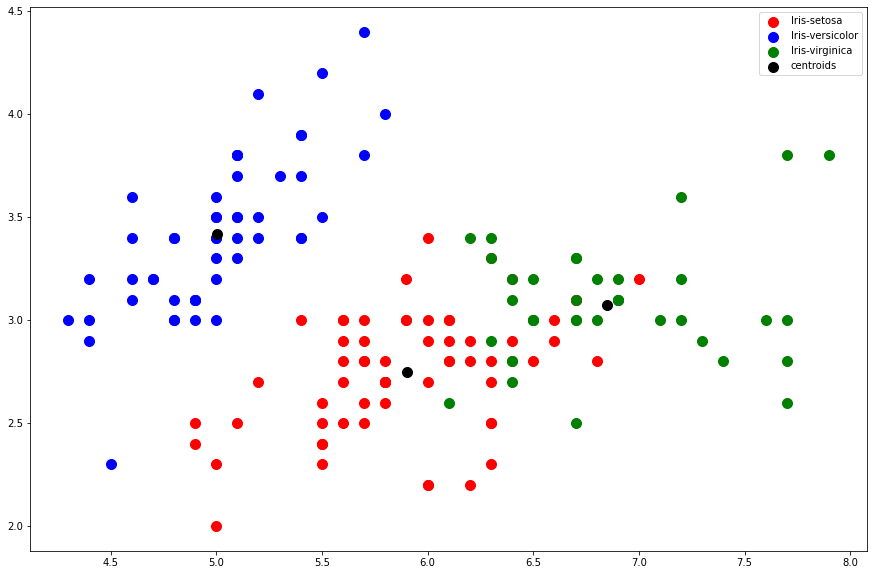

In [16]:
# plot the predict y point
plt.figure(figsize=(15,10))
plt.scatter(x0[:, 0], x0[:, 1], s=100, color='red', label='Iris-setosa')
plt.scatter(x1[:, 0], x1[:, 1], s=100, color='blue', label='Iris-versicolor')
plt.scatter(x2[:, 0], x2[:, 1], s=100, color='green', label='Iris-virginica')

# plot the centroids of each groupof points
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='black', label='centroids')
plt.legend()
plt.show()